In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
model = load_model(r"C:\Users\gokul\Face Emotion Recognition\artifacts\face_emotion_model.h5")

In [4]:
val_dir = r"C:\Users\gokul\Face Emotion Recognition\data\test"
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [5]:
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

c:\Users\gokul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step


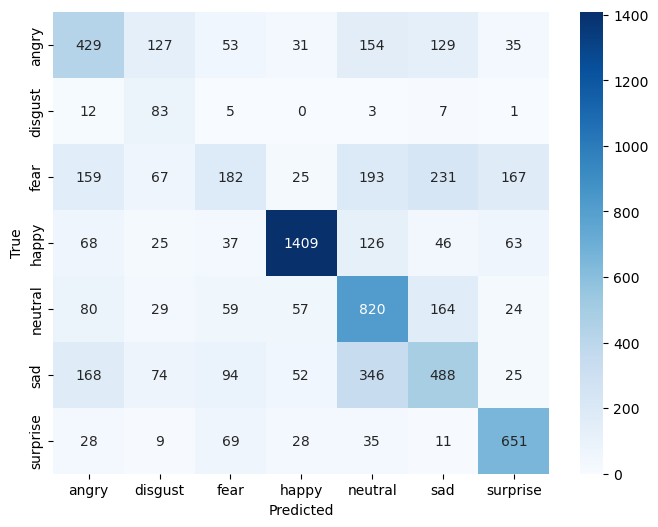

In [6]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [7]:
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

              precision    recall  f1-score   support

       angry       0.45      0.45      0.45       958
     disgust       0.20      0.75      0.32       111
        fear       0.36      0.18      0.24      1024
       happy       0.88      0.79      0.83      1774
     neutral       0.49      0.67      0.56      1233
         sad       0.45      0.39      0.42      1247
    surprise       0.67      0.78      0.72       831

    accuracy                           0.57      7178
   macro avg       0.50      0.57      0.51      7178
weighted avg       0.57      0.57      0.56      7178

